<a href="https://www.kaggle.com/code/kmnaimuddin/template-mathching-pattern-recognition?scriptVersionId=140258422" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import cv2
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
import matplotlib.pyplot as pl
import matplotlib.pyplot as plt

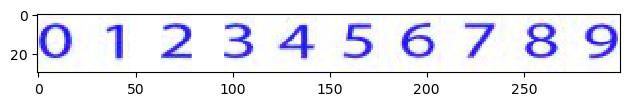

In [3]:
c = cv2.imread("/kaggle/input/pr-png/7.png")
imshow(c)
t = cv2.imread("/kaggle/input/pr-png/Template.png")
imshow(t)

In [4]:
cg = cv2.cvtColor(c, cv2.COLOR_BGR2GRAY)
tg = cv2.cvtColor(t, cv2.COLOR_BGR2GRAY)

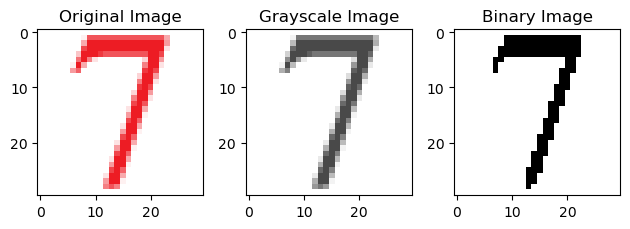

In [5]:
# Read the image
img = imread('/kaggle/input/pr-png/7.png')

# Display the original image
plt.subplot(131)
imshow(img)
plt.title('Original Image')

# Convert the image to grayscale
img_gray = rgb2gray(img)

# Display the grayscale image
plt.subplot(132)
imshow(img_gray, cmap='gray')
plt.title('Grayscale Image')

# Apply binary thresholding
thresh = threshold_otsu(img_gray)
binary_img = img_gray > thresh

# Display the binary image
plt.subplot(133)
imshow(binary_img, cmap='gray')
plt.title('Binary Image')

plt.tight_layout()
plt.show()

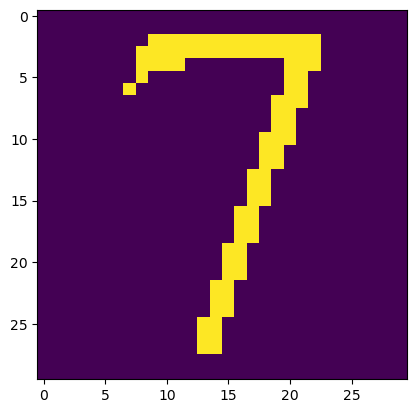

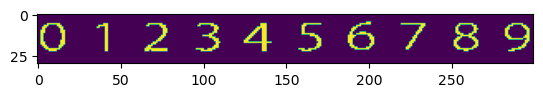

In [6]:
# img = cv2.imread('gradient.png',0)
ret,thresh2 = cv2.threshold(cg,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh2)
plt.show()

ret,thresh2T= cv2.threshold(tg,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh2T)
plt.show()

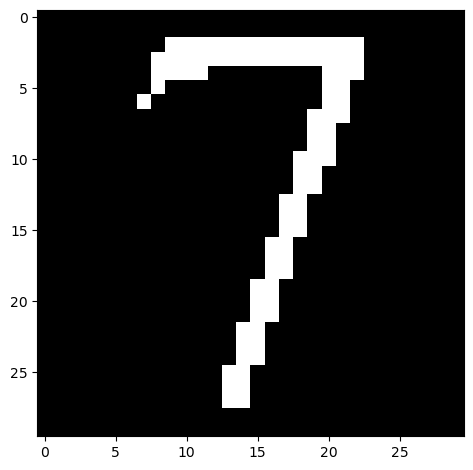

In [7]:
imshow(thresh2)

# > # > **Final Version****

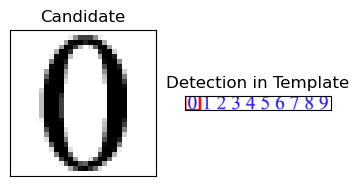

In [8]:
cg = cv2.imread('/kaggle/input/pr-png/Temp.png')  
template = cv2.imread('/kaggle/input/pr-png/0.png', cv2.IMREAD_GRAYSCALE)

# Convert the image to grayscale if it's not already
img = cv2.cvtColor(cg, cv2.COLOR_BGR2GRAY)

# Convert the image and the template to float32 data type
img = np.float32(img)
template = np.float32(template)

# Method to calculate normalized cross-correlation is changed to TM_CCORR_NORMED
method = cv2.TM_CCORR_NORMED
res = cv2.matchTemplate(img, template, method)

# Find the maximum value in the result to get the top-left coordinate
_, max_val, _, max_loc = cv2.minMaxLoc(res)
top_left = max_loc
h, w = template.shape[::-1]
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(cg, top_left, bottom_right, 255, 3)
cv2.rectangle(cg, top_left, bottom_right, 255, 3)

plt.subplot(131), plt.imshow(template, cmap='gray')
plt.title('Candidate'), plt.xticks([]), plt.yticks([])

# plt.subplot(132), plt.imshow(res, cmap='gray')
# plt.title('Matching result image'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(cg, cmap='gray')
plt.title('Detection in Template'), plt.xticks([]), plt.yticks([])

plt.show()